In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from collections import Counter
from pmareport import pmareport
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clinic = pmareport.Clinic()
clinic.drop_redundant()

In [7]:
df = clinic.df

In [24]:
def time_to_decimal(ser):
    return ser.dt.hour + ser.dt.minute/60.0

In [27]:
df['schedd'] = time_to_decimal(df.sched)
df['startd'] = time_to_decimal(df.start)
df['endd'] = time_to_decimal(df.end)
df['arrived'] = time_to_decimal(df.arrive)

In [28]:
df.head()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,...,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor,schedd,startd,endd
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,...,12,15,1,0,16,0,0,7.983333,8.116667,8.366667
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,...,3,35,1,0,16,1,0,8.250000,8.300000,8.883333
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,...,16,35,1,0,16,2,0,8.500000,8.700000,9.283333
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,...,8,28,1,0,16,3,0,9.000000,9.183333,9.650000
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,...,4,16,1,0,16,4,1,10.000000,10.000000,10.266667


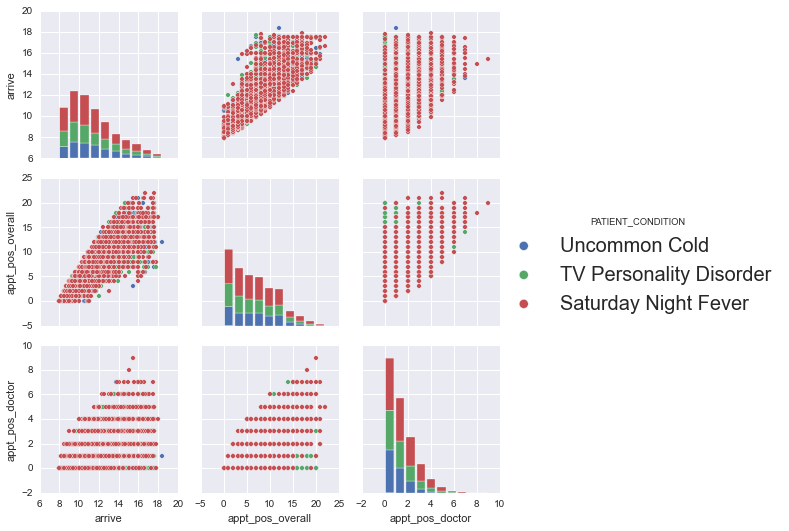

In [33]:
clinic.make_pairplot(pair_vars=['arrive', 'appt_pos_overall', 'appt_pos_doctor'])

In [13]:
df.appt_pos_doctor.max()

9

In [15]:
set(df.date.dt.year)

{2005}

In [17]:
def get_appt_pos2(pid, doc=False):
    appt_row = df[df.PATIENT_ID == pid]
    day = appt_row.date.iloc[0]
    start_time = appt_row.start.iloc[0]
    if doc:
        doctor = appt_row.PROVIDER_NAME.iloc[0]
        appts_that_day = df[(df.date == day) & (df.PROVIDER_NAME == doctor)]
    else:
        appts_that_day = df[df.date == day]
    start_times = appts_that_day.groupby('start').start.max()
    appt_pos = list(start_times).index(start_time)
    return appt_pos

In [98]:
def get_appt_pos_doctor(pid):
    appt_row = df[df.PATIENT_ID == pid]
    day = appt_row.date.iloc[0]
    sched_time = appt_row.sched.iloc[0]
    doctor = appt_row.PROVIDER_NAME.iloc[0]
    appts_that_day = df[(df.date == day) & (df.PROVIDER_NAME == doctor)]
    sched_times = appts_that_day.groupby('sched').sched.max()
    appt_pos_overall = list(sched_times).index(sched_time)
    return appt_pos_overall

In [112]:
df['appt_pos_verall'] = df.PATIENT_ID.apply(get_appt_pos)

In [18]:
df['appt_pos_start'] = df.PATIENT_ID.apply(lambda x : get_appt_pos2(x, doc=True))

In [44]:
df_incon = df[df.appt_pos_doctor != df.appt_pos_start]

In [45]:
len(df_incon)

625

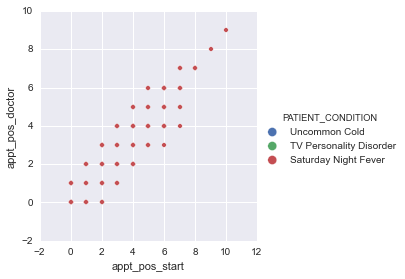

In [26]:
g = sns.FacetGrid(data=df, hue='PATIENT_CONDITION', size=4)
g = g.map(plt.scatter, 'appt_pos_start', 'appt_pos_doctor', edgecolor='w')
g.add_legend(fontsize=10, markerscale=2)

In [46]:
row = df_incon.iloc[0]
day = row.date
doctor = row.PROVIDER_NAME

In [47]:
df[(df.PROVIDER_NAME == doctor) & (df.date == day)]

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor,appt_pos_start
35,4599501,Uncommon Cold,Medifix,42,F,M. Dupont,2005-01-05,1900-01-01 09:15:00,1900-01-01 09:22:00,1900-01-01 09:39:00,1900-01-01 09:11:00,-1 days +23:56:00,11,17,1,2,20,3,0,0
39,4590417,Uncommon Cold,Self Insured,45,M,M. Dupont,2005-01-05,1900-01-01 10:59:00,1900-01-01 11:13:00,1900-01-01 11:31:00,1900-01-01 11:02:00,00:03:00,11,18,1,2,20,6,1,2
40,4603731,Uncommon Cold,Self Insured,28,F,M. Dupont,2005-01-05,1900-01-01 10:59:00,1900-01-01 11:05:00,1900-01-01 11:22:00,1900-01-01 10:59:00,00:00:00,6,17,1,2,20,6,1,1
41,4591536,Uncommon Cold,ConglomoHealth,34,M,M. Dupont,2005-01-05,1900-01-01 11:30:00,1900-01-01 11:36:00,1900-01-01 11:55:00,1900-01-01 11:26:00,-1 days +23:56:00,10,19,1,2,20,7,2,3


In [4]:
pair_vars=[
    'AGE',
    'delay',
    'appt_time',
    'month',
    'appt_pos_overall',
    'appt_pos_doctor'
    ]
hue='PATIENT_CONDITION'

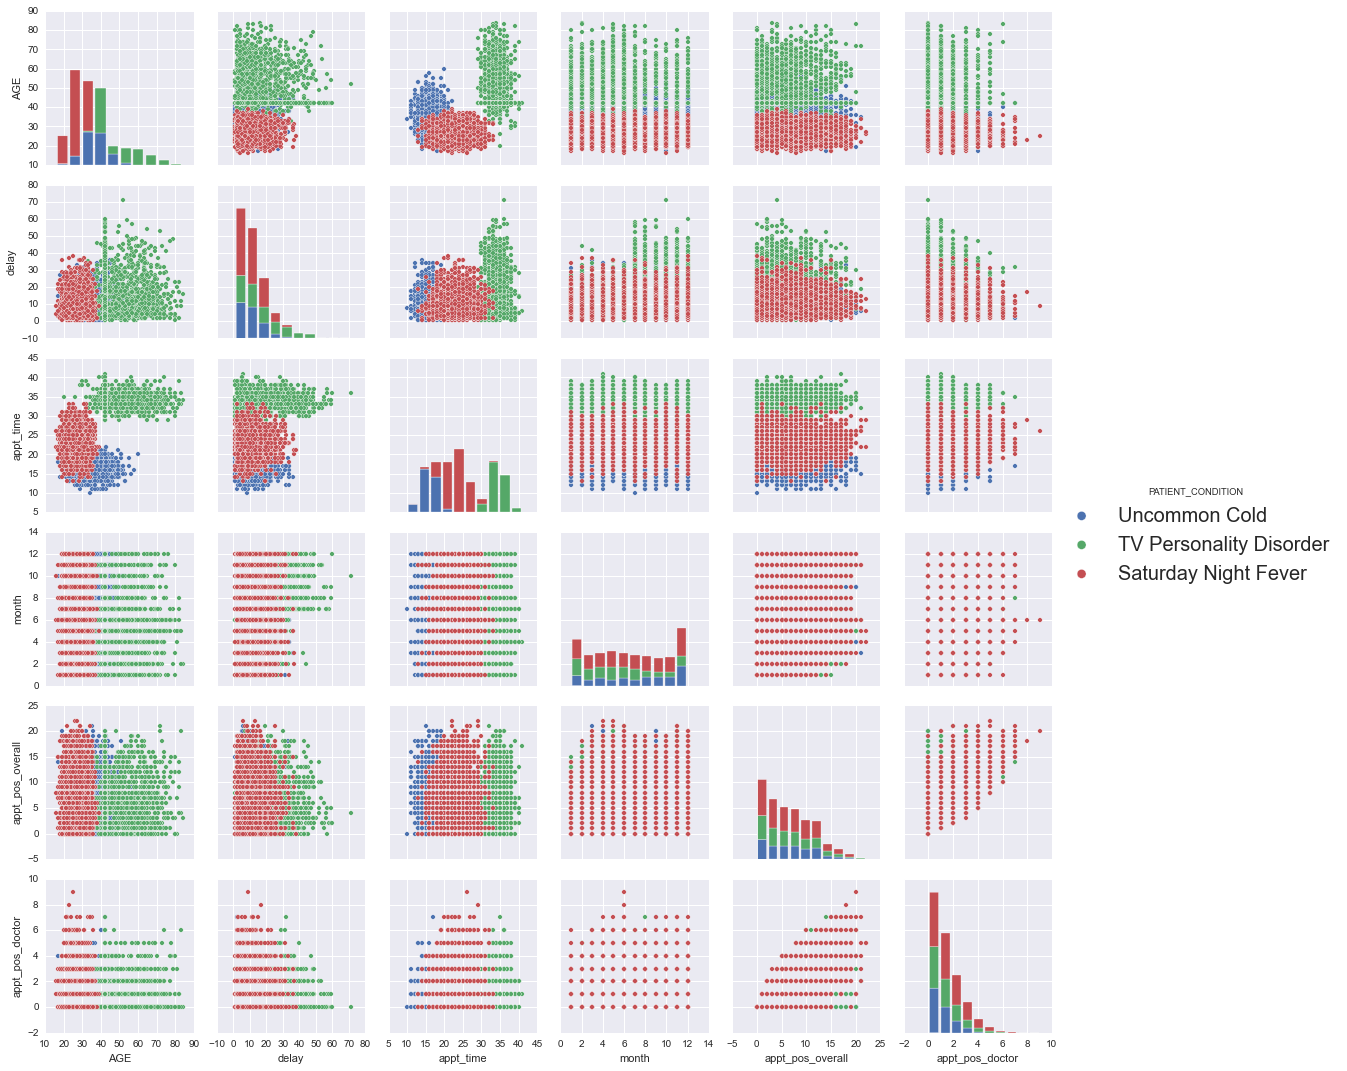

In [6]:
g = sns.PairGrid(
    data=df,
    vars=pair_vars,
    hue=hue
    )
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor='w')
g.add_legend(fontsize=20, markerscale=2)
# g.savefig('appt_pos_pairgrid.png', dpi=300)

In [102]:
for i in df.PATIENT_ID[:10]:
    print get_appt_pos_doctor(i), df[df.PATIENT_ID == i].PROVIDER_NAME.iloc[0]

 0 L. Jedermann
0 I. Petrov
0 E. Medelsvensson
0 J. Smith
1 L. Jedermann
0 N. Fulano
0 M. Dupont
1 I. Petrov
1 N. Fulano
2 I. Petrov


In [38]:
df.columns

Index([u'PATIENT_ID', u'PATIENT_CONDITION', u'INSURANCE_TYPE', u'AGE', u'SEX',
       u'VISIT_DATE', u'PT_SCHEDULED_APPT', u'PT_ARRIVE_TIME',
       u'PT_START_TIME', u'PT_END_TIME', u'PROVIDER_NAME', u'date', u'sched',
       u'start', u'end', u'arrive', u'lateness', u'delay', u'appt_time',
       u'month', u'dayofweek', u'num_appts', u'appt_pos_overall',
       u'appt_pos_doctor', u'appt_pos_start'],
      dtype='object')

In [41]:
    def drop_redundant(
            cols=[
                'VISIT_DATE',
                'PT_SCHEDULED_APPT',
                'PT_ARRIVE_TIME',
                'PT_START_TIME',
                'PT_END_TIME'
                ]
            ):
        for col in cols:
            df.drop(col, axis=1, inplace=True)

In [42]:
drop_redundant()

In [43]:
df.head()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor,appt_pos_start
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,1900-01-01 07:55:00,-1 days +23:56:00,12,15,1,0,16,0,0,0
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,1900-01-01 08:15:00,00:00:00,3,35,1,0,16,1,0,0
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,1900-01-01 08:26:00,-1 days +23:56:00,16,35,1,0,16,2,0,0
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,1900-01-01 09:03:00,00:03:00,8,28,1,0,16,3,0,0
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,1900-01-01 09:56:00,-1 days +23:56:00,4,16,1,0,16,4,1,1
